In [1]:
# IMPORT DEPENDENCIES
# Import dependencies
import numpy as np
import pandas as pd
import os

In [2]:
# READ IN FILE
df = pd.read_csv('Tables/free_text_df.csv')
df.head(10)

,Rank,OrgStudyId,WhyStopped,EnrollmentCount,PrimaryOutcomeMeasure,FlowDropWithdrawType
0,1,BTX-BCI-016-PRT,NaN,3000,To determine BCI test performance by evaluatin...,NaN
1,2,2018-TJ-BCD,NaN,2300,Diagnostic potential of SEMA4C as a biomarker ...,NaN
2,3,Breast cancer,NaN,80,Role of SORCIN in patients with breast cancer,NaN
3,4,BC-BOMET,NaN,30,SENP1 expression,NaN
4,5,241391,NaN,600,Performance of the Syantra DX Breast Cancer te...,NaN
5,6,IL-TM-B1-01,NaN,200,This study is intended to evaluate the sensiti...,NaN
6,7,FH-Risk 2.0 Research Protocol,NaN,271,To explore how much new risk models change bre...,NaN
7,8,ID-RPSBC-01-20201012,NaN,316,Absolute risk difference between breast cancer...,NaN
8,9,IRST174.22,NaN,60000,To compare the cumulative incidence of stage 2...,NaN
9,10,ANILERGİNN,NaN,300,breast cancer incidence after laparoscopic sle...,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5013 non-null   int64 
 1   OrgStudyId             5013 non-null   object
 2   WhyStopped             320 non-null    object
 3   EnrollmentCount        5013 non-null   int64 
 4   PrimaryOutcomeMeasure  5013 non-null   object
 5   FlowDropWithdrawType   70 non-null     object
dtypes: int64(2), object(4)
memory usage: 235.1+ KB


In [4]:
# Extract WhyStopped column and drop null values
df_text = pd.DataFrame(df['WhyStopped'])
df_text = df_text.dropna()
df_text

,WhyStopped
32,Pandemic situation
47,Technical problem with plasma blood samples ob...
50,study did not start and is currently on pause
54,Principal investigator left the study institut...
84,The study was stopped prematurely due to insuf...
...,...
4967,Technical problem with blood plasma samples ob...
4968,Evolving data with Ipatasertib that changes th...
4970,Study is part of PhD trajectory and currently ...
4981,no funding


In [5]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 32 to 4986
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WhyStopped  320 non-null    object
dtypes: object(1)
memory usage: 5.0+ KB


In [6]:
df_text['word_count'] = df_text['WhyStopped'].apply(lambda x: len(str(x).split(" ")))
df_text.head(10)

,WhyStopped,word_count
32,Pandemic situation,2
47,Technical problem with plasma blood samples ob...,10
50,study did not start and is currently on pause,9
54,Principal investigator left the study institut...,6
84,The study was stopped prematurely due to insuf...,9
97,No participants enrolled,3
105,PI no longer working at Indiana University;,7
112,Temporarily paused per study team for interim ...,9
131,Study classified as out of scope by the Ethics...,16
143,Enrollment into AWARE cohorts1-4 have conclude...,18


In [7]:
# AVERAGE WORD COUNT
df_text['word_count'].mean()

9.0625

In [8]:
# IMPORT STOPWORD LIBRARY
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [9]:
df_text['stop_words'] = df_text['WhyStopped'].apply(
    lambda x: len([x for x in x.split() if x in stop]))
df_text.head(10)

,WhyStopped,word_count,stop_words
32,Pandemic situation,2,0
47,Technical problem with plasma blood samples ob...,10,3
50,study did not start and is currently on pause,9,5
54,Principal investigator left the study institut...,6,1
84,The study was stopped prematurely due to insuf...,9,2
97,No participants enrolled,3,0
105,PI no longer working at Indiana University;,7,2
112,Temporarily paused per study team for interim ...,9,1
131,Study classified as out of scope by the Ethics...,16,6
143,Enrollment into AWARE cohorts1-4 have conclude...,18,8


In [10]:
# AVERAGE STOPWORDS
df_text['stop_words'].mean()

2.95625

In [11]:
# LOWERCASE RESPONSES
df_text['WhyStopped'] = df_text['WhyStopped'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))
df_text.head(10)

,WhyStopped,word_count,stop_words
32,pandemic situation,2,0
47,technical problem with plasma blood samples ob...,10,3
50,study did not start and is currently on pause,9,5
54,principal investigator left the study institut...,6,1
84,the study was stopped prematurely due to insuf...,9,2
97,no participants enrolled,3,0
105,pi no longer working at indiana university;,7,2
112,temporarily paused per study team for interim ...,9,1
131,study classified as out of scope by the ethics...,16,6
143,enrollment into aware cohorts1-4 have conclude...,18,8


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
# REMOVING PUNCTUATION
df_text['WhyStopped'] = df_text['WhyStopped'].str.replace('[^\w\s]','')
df_text.head(10)

,WhyStopped,word_count,stop_words
32,pandemic situation,2,0
47,technical problem with plasma blood samples ob...,10,3
50,study did not start and is currently on pause,9,5
54,principal investigator left the study institution,6,1
84,the study was stopped prematurely due to insuf...,9,2
97,no participants enrolled,3,0
105,pi no longer working at indiana university,7,2
112,temporarily paused per study team for interim ...,9,1
131,study classified as out of scope by the ethics...,16,6
143,enrollment into aware cohorts14 have concluded...,18,8


In [14]:
# REMOVE STPWORDS
df_text['filtered_responses'] = df_text['WhyStopped'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))
df_text.head(10)

,WhyStopped,word_count,stop_words,filtered_responses
32,pandemic situation,2,0,pandemic situation
47,technical problem with plasma blood samples ob...,10,3,technical problem plasma blood samples obtaine...
50,study did not start and is currently on pause,9,5,study start currently pause
54,principal investigator left the study institution,6,1,principal investigator left study institution
84,the study was stopped prematurely due to insuf...,9,2,study stopped prematurely due insufficient rec...
97,no participants enrolled,3,0,participants enrolled
105,pi no longer working at indiana university,7,2,pi longer working indiana university
112,temporarily paused per study team for interim ...,9,1,temporarily paused per study team interim data...
131,study classified as out of scope by the ethics...,16,6,study classified scope ethics committee projec...
143,enrollment into aware cohorts14 have concluded...,18,8,enrollment aware cohorts14 concluded primary o...


In [15]:
# WORD FREQUENCY
freq = pd.Series(' '.join(df_text['filtered_responses']).split()).value_counts()[:3]
freq

study       112
due          76
decision     35
dtype: int64

In [16]:
# FILTERING OUT TOP THREE MOST FREQUENT WORDS
freq = list(freq.index)
df_text['filtered_responses'] = df_text['filtered_responses'].apply(
    lambda x: " ".join(x for x in x.split() if x not in freq))
df_text['filtered_responses'].head()

32                                   pandemic situation
47    technical problem plasma blood samples obtaine...
50                                start currently pause
54              principal investigator left institution
84         stopped prematurely insufficient recruitment
Name: filtered_responses, dtype: object

In [17]:
new_freq = pd.Series(' '.join(df_text['filtered_responses']).split()).value_counts()[:10]
new_freq

sponsor        30
funding        27
enrollment     25
accrual        25
recruitment    24
covid19        23
terminated     22
safety         21
patients       20
trial          19
dtype: int64

<AxesSubplot:>

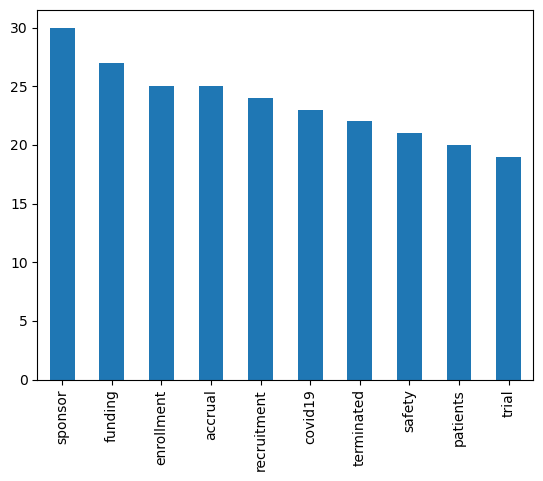

In [18]:
import matplotlib.pyplot as plt
new_freq.plot.bar()

In [19]:
rate_freq = df_text.loc[df_text['WhyStopped'].str.contains("sponsor", case=False)]
rate_freq.sample(20)

,WhyStopped,word_count,stop_words,filtered_responses
3413,sponsor decision,2,0,sponsor
3315,funding sponsor filing of chapter 11 bankruptcy,8,1,funding sponsor filing chapter 11 bankruptcy
4127,sponsor decision based on strategic realignment,6,1,sponsor based strategic realignment
1897,decision to discontinue the study based on bro...,24,9,discontinue based broader development strategi...
2570,this was a sponsor decision and was not a cons...,14,8,sponsor consequence safety concern
896,after demonstrating the on target effect of gm...,23,6,demonstrating target effect gmi1359 via pharma...
4221,sponsor decision based on strategic realignment,6,1,sponsor based strategic realignment
2267,administrative closure based on sponsor recomm...,10,2,administrative closure based sponsor recommend...
4610,based on the overall results from the phase 1 ...,28,12,based overall results phase 1 part sponsor dec...
1242,terminated by sponsor due to lack of interest,8,3,terminated sponsor lack interest


In [36]:
df_text['WhyStopped'].tail(30)

9983     confirmed objective response rate by recist 11...
9984     level of decisional conflict level of decision...
9985     cancerrelated fatigue severity as assessed usi...
9986             detection rate of sentinel node technique
9987     risk of reporting cancer overall specific canc...
9988     time until adverse liver outcome assessed by i...
9989     the feasibility of hpv testing as a single vis...
9990                                genomics outcome scale
9991     fatigue severity impact of fatigue state of fa...
9992     the role of vitamin d in response to neoadjuva...
9993     rate of men diagnosed with pc and aggressive p...
9994                 doubling of progression free survival
9995                           objective response rate orr
9996     icg transit time detected by the smartgoggles ...
9997     number of participants with grade 2 radiation ...
9998                 the number of circulating tumor cells
9999     to evaluate the impact of visceral adipose tis.

In [20]:
# IMPORT WORDCLOUD LIBRARY
from wordcloud import WordCloud

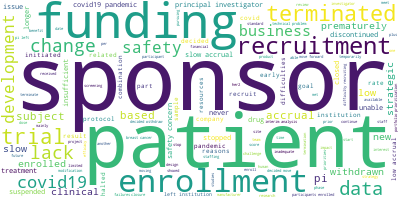

In [21]:
# GENERATE A WORD CLOUD OF FILTERED RESPONSES
long_string = ','.join(list(df_text['filtered_responses'].values))

wordcloud = WordCloud(
    background_color="white",
    max_words = 5000,
    contour_width=3,
    contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

In [24]:
# IMPORT GENSIM FOR LATENT DIRILECHT ALLOCATION
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

In [25]:
# TOKENIZE FILTERED RESPONSES
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))

data = df_text.filtered_responses.values.tolist()
data_words = list(sent_to_words(data))

print(data_words)

[['pandemic', 'situation'], ['technical', 'problem', 'plasma', 'blood', 'samples', 'obtained', 'patients'], ['start', 'currently', 'pause'], ['principal', 'investigator', 'left', 'institution'], ['stopped', 'prematurely', 'insufficient', 'recruitment'], ['participants', 'enrolled'], ['pi', 'longer', 'working', 'indiana', 'university'], ['temporarily', 'paused', 'per', 'team', 'interim', 'data', 'review'], ['classified', 'scope', 'ethics', 'committee', 'project', 'involving', 'human', 'person'], ['enrollment', 'aware', 'cohorts', 'concluded', 'primary', 'objective', 'core', 'goals', 'met'], ['slow', 'recruitment', 'rate'], ['sponsor', 'prematurely', 'stop', 'linked', 'safety', 'concern'], ['one', 'participant', 'accrued', 'stopped', 'new', 'safety', 'data', 'company', 'slow', 'accrual'], ['researcher', 'able', 'recruit', 'patients', 'abandoned', 'project'], ['unable', 'achieve', 'devices', 'used'], ['moving', 'different', 'institution', 'pi'], ['decided', 'halt', 'potentially', 'reopen'

In [26]:
# CREATING TERM DICTINOARY OF CORPUS
dictionary = corpora.Dictionary(data_words)

In [27]:
# CONVERT CORPUS INTO DOC-TERM MATRIX
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_words]

print(doc_term_matrix)

[[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1)], [(20, 1), (21, 1)], [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(18, 1), (51, 1), (52, 1)], [(17, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(19, 1), (27, 1), (52, 1), (55, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(4, 1), (40, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(68, 1), (69, 1), (70, 1), (71, 1)], [(12, 1), (24, 1), (72, 1), (73, 1)], [(74, 1), (75, 1), (76, 1), (77, 1), (78, 1)], [(79, 1), (80, 1), (81, 1), (82, 1), (83, 1)], [(17, 1), (18, 1), (84, 1), (85, 1)], [(0, 1), (18, 1), (19, 1), (63, 1), (86, 1)], [(4, 1), (20, 1), (87, 1)], [(88, 1), (89, 1

In [29]:
[[(dictionary[i], freq) for i, freq in doc] for doc in doc_term_matrix[:10]]

[[('pandemic', 1), ('situation', 1)],
 [('blood', 1),
  ('obtained', 1),
  ('patients', 1),
  ('plasma', 1),
  ('problem', 1),
  ('samples', 1),
  ('technical', 1)],
 [('currently', 1), ('pause', 1), ('start', 1)],
 [('institution', 1), ('investigator', 1), ('left', 1), ('principal', 1)],
 [('insufficient', 1), ('prematurely', 1), ('recruitment', 1), ('stopped', 1)],
 [('enrolled', 1), ('participants', 1)],
 [('indiana', 1), ('longer', 1), ('pi', 1), ('university', 1), ('working', 1)],
 [('data', 1),
  ('interim', 1),
  ('paused', 1),
  ('per', 1),
  ('review', 1),
  ('team', 1),
  ('temporarily', 1)],
 [('classified', 1),
  ('committee', 1),
  ('ethics', 1),
  ('human', 1),
  ('involving', 1),
  ('person', 1),
  ('project', 1),
  ('scope', 1)],
 [('aware', 1),
  ('cohorts', 1),
  ('concluded', 1),
  ('core', 1),
  ('enrollment', 1),
  ('goals', 1),
  ('met', 1),
  ('objective', 1),
  ('primary', 1)]]

In [30]:
# CREATING THE OBJECT FOR LDA MODEL 
Lda = gensim.models.ldamodel.LdaModel

In [31]:
# RUNNING AND TRAINING LDA MODEL
ldamodel = Lda(
    doc_term_matrix, num_topics=3, id2word=dictionary, passes=50)

print(ldamodel.print_topics())

[(0, '0.032*"enrollment" + 0.022*"terminated" + 0.021*"pi" + 0.019*"accrual" + 0.015*"institution" + 0.013*"enrolled" + 0.012*"low" + 0.011*"patients" + 0.011*"left" + 0.008*"slow"'), (1, '0.036*"sponsor" + 0.022*"safety" + 0.018*"development" + 0.016*"business" + 0.016*"slow" + 0.014*"accrual" + 0.014*"data" + 0.014*"strategic" + 0.014*"change" + 0.013*"based"'), (2, '0.035*"funding" + 0.028*"recruitment" + 0.028*"covid" + 0.012*"lack" + 0.011*"pandemic" + 0.009*"patients" + 0.009*"insufficient" + 0.009*"subjects" + 0.009*"trial" + 0.008*"never"')]


In [34]:
import pyLDAvis
import pickle
import pyLDAvis.gensim_models

In [37]:
# VISUALIZE THE TOPICS
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.124959  0.052005       1        1  34.073612
0     -0.009108 -0.117322       2        1  33.859391
1     -0.115850  0.065317       3        1  32.066997, topic_info=            Term       Freq      Total Category  logprob  loglift
151      funding  19.000000  19.000000  Default  30.0000  30.0000
46    enrollment  18.000000  18.000000  Default  29.0000  29.0000
56       sponsor  21.000000  21.000000  Default  28.0000  28.0000
18   recruitment  17.000000  17.000000  Default  27.0000  27.0000
24            pi  11.000000  11.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
61           new   2.982376   7.676073   Topic3  -5.1545   0.1920
4       patients   3.450958  14.649983   Topic3  -5.0086  -0.3084
223      patient   2.643624   6.247916   Topic3  -5.2751   0.2772
85           low   2.317066  11.887986   Topic3  -5.4070  -0.4979
147      changes   2.309745   4.156629   Topic3  -5.4101   0.5498

[186 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
58        2  0.605562    accrual
58        3  0.385358    accrual
455       1  0.959249   achieved
153       1  0.576575    another
153       3  0.288287    another
...     ...       ...        ...
494       3  0.962652         us
140       2  0.949880       wait
143       1  0.390273  withdrawn
143       2  0.520364  withdrawn
143       3  0.130091  withdrawn

[194 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

/Users/alejandra/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/alejandra/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/alejandra/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/alejandra/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/alejandra

In [38]:
pyLDAvis.save_html(p, 'lda.html')

In [45]:
import imageio.v2 as imageio
import os


In [48]:
filepath = os.listdir('Images/Gif')
print(filepath)

['topic1.png', 'topic2.png', 'topic3.png']


In [50]:
image_path = [os.path.join('Images/Gif',file) for file in filepath]


In [51]:
images = []
for img in image_path:
        images.append(imageio.imread(img))
        
imageio.mimwrite('Images/LDAvis.gif', images, fps=1)